In [160]:
# we want to generate a report for each cave. 

from pylatex import Document, Section, Subsection, Command, Figure, PageStyle, Head, Foot, NewPage, MiniPage, LineBreak
from pylatex.utils import italic, NoEscape

from yaml import load
from yaml.loader import Loader

import os
import matplotlib.pyplot as plt
import numpy as np
import pyproj
from shapely import Point
import geopandas as gpd

In [161]:
# load the different polyline elements. 
BASENAME = "12_RuptDuPuits"
PROCESSING_PARAMS = f"../../real_data/{BASENAME}/params.yaml"
SCAN_DESCRIPTION = f"../../real_data/{BASENAME}/scan_description.yaml"

desc = load(open(SCAN_DESCRIPTION), Loader)

In [162]:
THECAVENAME = desc["cave"]["fullCaveName"]
THEDOCAUTHOR = desc["documentAuthor"]
THECAVEHYDRO = desc["cave"]["hydrology"]
THECAVEGEO = desc["cave"]["geology"]

In [163]:
# from complex_report.html 

def generate_unique():
    
    # Some geometry options. 
    geometry_options = {
        "head" : "1in",
        "margin" : "1.5in",
        "bottom" : "1in",
        "includeheadfoot":True
    }

    doc = Document(geometry_options)

    # generate a first page style
    first_page = PageStyle("firstpage")

    # Add the document title 

    with first_page.create(Head("C")) as centered_header:
        with centered_header.create(MiniPage(width=NoEscape(r"0.49\textwidth"), pos= "c")) as title_wrapper:
            title_wrapper.append(f"Scan assembly and analysis report for: {THECAVENAME}")
            title_wrapper.append(LineBreak())
            title_wrapper.append(f"authored by: {THEDOCAUTHOR}")

    with first_page.create(Foot("C")) as centered_footer:
        with centered_footer.create(MiniPage(width=NoEscape(r"0.49\textwidth"), pos= "c")) as footer_wrapper:
            centered_footer.append(r"\section")

    doc.preamble.append(first_page)
    doc.change_document_style("firstpage")
    
    # add a section about hydrology.
    with doc.create(Section("Cave description")):
        doc.append(THECAVEHYDRO)
        doc.append(THECAVEGEO)

    texcode = doc.dumps()

    with open("test.tex", "w") as f:
        f.write(texcode)
        f.close()
    return texcode

generate_unique()

"\\documentclass{article}%\n\\usepackage[T1]{fontenc}%\n\\usepackage[utf8]{inputenc}%\n\\usepackage{lmodern}%\n\\usepackage{textcomp}%\n\\usepackage{lastpage}%\n\\usepackage{fancyhdr}%\n\\usepackage{ragged2e}%\n%\n\\fancypagestyle{firstpage}{%\n\\renewcommand{\\headrulewidth}{0pt}%\n\\renewcommand{\\footrulewidth}{0pt}%\n\\fancyhead{%\n}%\n\\fancyfoot{%\n}%\n\\fancyhead[C]{%\n\\begin{minipage}[c]{0.49\\textwidth}%\nScan assembly and analysis report for: Système du Rupt du Puits%\n\\linebreak%\nauthored by: Tanguy Racine%\n\\end{minipage}%\n}%\n\\fancyfoot[C]{%\n\\begin{minipage}[c]{0.49\\textwidth}%\n\\textbackslash{}section%\n\\end{minipage}%\n}%\n}%\n%\n\\begin{document}%\n\\normalsize%\n\\pagestyle{firstpage}%\n\\section{Cave description}%\n\\label{sec:Cavedescription}%\nunderground course of the river Saulx%\n\\{'lithology': 'limestone', 'tectonics': 'as yet unknown'\\}\n\n%\n\\end{document}"

Make a map of cave locations

In [164]:
caveslist = os.listdir("../../real_data/")

In [165]:
entrances = {}
for cave in caveslist:
    SCAN_DESCRIPTION = f"../../real_data/{cave}/scan_description.yaml"
    desc = load(open(SCAN_DESCRIPTION), Loader)
    entrances[desc["cave"]["fullCaveName"]] = desc["cave"]["entrance"]


In [169]:
TOCRS = "3034"

In [379]:
world_karst  = gpd.read_file("../../sample_data/WHYMAP_WOKAM/shp/whymap_karst__v1_poly.shp")
world_karst.crs = {"init": "epsg:4326"}
world_karst = world_karst.to_crs(epsg=TOCRS)

c:\Users\tangr\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [178]:
world_borders  = gpd.read_file("../../sample_data/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp")
world_borders.crs = {"init": "epsg:4326"}
world_borders = world_borders.to_crs(epsg=TOCRS)

c:\Users\tangr\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [250]:
reproject = lambda x, y: pyproj.transform(crs1, crs2, x, y)
inverse_reproject = lambda x, y: pyproj.transform(crs2, crs1, x, y)

crs1 = pyproj.Proj("EPSG:4326")
crs2 = pyproj.Proj(f"EPSG:{TOCRS}")
longs, lats = np.meshgrid(np.linspace(-25, 35, 601),np.linspace(35, 65, 301))
xi, yi = reproject(lats, longs)

miny, minx = reproject(41, -5)
maxy, maxx = reproject(54, 14)

C:\Users\tangr\AppData\Local\Temp\ipykernel_26036\255193216.py:1: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  reproject = lambda x, y: pyproj.transform(crs1, crs2, x, y)


C:\Users\tangr\AppData\Local\Temp\ipykernel_26036\255193216.py:1: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  reproject = lambda x, y: pyproj.transform(crs1, crs2, x, y)


In [364]:
def my_format(x, easting=True):
    if easting == True:
        return f"{x:.0f} E"
    else:
        return f"{x:.0f} N"

c:\Users\tangr\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\tangr\AppData\Local\Temp\ipykernel_26036\255193216.py:2: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  inverse_reproject = lambda x, y: pyproj.transform(crs2, crs1, x, y)
C:\Users\tangr\AppData\Local\Temp\ipykernel_26036\255193216.py:1: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  reproject = lambda x, y: pyproj.transform(crs1, crs2, x, y)


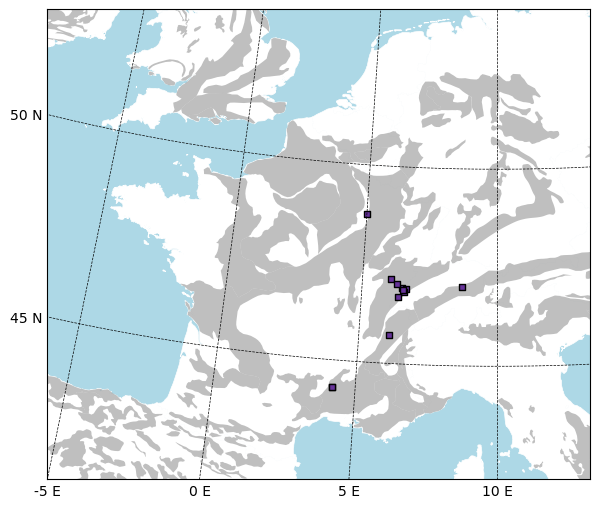

In [397]:
fig, ax = plt.subplots(figsize = (7, 7))

points = [Point(c["longitude"]["value"], c["latitude"]["value"]) for label, c in entrances.items() if c["latitude"]["value"] is not None]
caves = gpd.GeoDataFrame(geometry=points)
caves.crs = {"init": "epsg:4326"}
caves = caves.to_crs(epsg=TOCRS)
ax.set_facecolor("lightblue")
world_borders.plot(ax=ax, color = "white", edgecolor="white", lw = 0.5)
world_karst.plot( ax=ax, edgecolor="None", lw = 0, zorder = 1, alpha = 0.5, legend=True, color = "grey") #"RTypeLabel"

caves.plot(ax =ax, color = "rebeccapurple", edgecolor="k", marker = "s", markersize = 14, zorder = 50)

for i in np.arange(0, xi.shape[0], 50):
    ax.plot(yi[i], xi[i], zorder = 100, color = "black", ls = "--", lw = 0.5)

for i in np.arange(0, xi.shape[1], 50):
    ax.plot(yi[:, i], xi[:, i], zorder = 100, color = "black", ls = "--", lw = 0.5)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


ax.set_xticks([])
ax.set_yticks([])

# inverse the coordinates of long lat where we want the ticks. 
topticks = inverse_reproject(np.ones(int(1e3))* maxy, np.linspace(minx, maxx, int(1e3)))
bottomticks = inverse_reproject(np.ones(int(1e3))* miny, np.linspace(minx, maxx, int(1e3)))
leftticks = inverse_reproject(np.linspace(miny, maxy, int(1e3)), np.ones(int(1e3))* minx)

topstep = np.mean(np.diff(topticks[1]))
bottomstep = np.mean(np.diff(bottomticks[1]))
leftstep = np.mean(np.diff(leftticks[0]))

top_idx = np.argwhere(topticks[1] % 5 <=  1* topstep)
bottom_idx = np.argwhere(bottomticks[1] % 5 <=  0.9*bottomstep)
left_idx = np.argwhere(leftticks[0] % 5 <=  0.9*leftstep)

topticks_long = topticks[1][top_idx].flatten()
topticks_lat = topticks[0][top_idx].flatten()

bottomticks_long = bottomticks[1][bottom_idx].flatten()
bottomticks_lat = bottomticks[0][bottom_idx].flatten()

leftticks_long = leftticks[1][left_idx].flatten()
leftticks_lat = leftticks[0][left_idx].flatten()

topticks_y, topticks_x = reproject(topticks_lat, topticks_long)
bottomticks_y, bottomticks_x= reproject(bottomticks_lat, bottomticks_long)
leftticks_y, leftticks_x= reproject(leftticks_lat, leftticks_long)


ax.set_xticks(bottomticks_x,[my_format(x) for x in np.round(bottomticks_long, 0)])
ax.set_yticks(leftticks_y,[my_format(x, easting=False) for x in np.round(leftticks_lat, 0)])
ax.tick_params("both", length= 0)
#ax1.set_xticks([])
#ax1.set_xlim(minx, maxx)
#ax1.set_xticks(topticks_x,[my_format(x) for x in np.round(topticks_long, 0)])
plt.savefig("overview.png", dpi = 300)

In [385]:
world_karst

,rock_type,RTypeLabel,geometry
0,3,Continuous evaporite rocks,"POLYGON ((5964164.893 1901208.288, 5972439.947..."
1,3,Continuous evaporite rocks,"POLYGON ((6045306.162 1900016.293, 6042704.406..."
2,3,Continuous evaporite rocks,"POLYGON ((6100689.980 1909244.495, 6103348.088..."
3,3,Continuous evaporite rocks,"POLYGON ((6179425.413 1915739.122, 6178788.456..."
4,3,Continuous evaporite rocks,"POLYGON ((6047448.730 1744363.676, 6050092.282..."
...,...,...,...
2800,1,Continuous carbonate rocks,"POLYGON ((4700989.191 3570213.052, 4705337.995..."
2801,1,Continuous carbonate rocks,"POLYGON ((4742107.250 3587046.791, 4744661.222..."
2802,2,Discontinuous carbonate rocks,"POLYGON ((-6038529.179 117384.082, -6047755.54..."
2803,1,Continuous carbonate rocks,"POLYGON ((-4913867.426 68609.897, -4952430.320..."
